In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import *
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:/Users/Jinyoung/Pictures/python_analysis/fc_preprocessing/rawdata/part2/지점별_일별판매량.csv', engine='python')

In [4]:
df.columns

Index(['일자', '지점A', '지점B', '지점C'], dtype='object')

In [5]:
df.head()

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222


In [6]:
# 데이터 분할 (결측이 포함되어 있을 수 있으므로 dropna를 사용)
A = df['지점A'].dropna().values
B = df['지점B'].dropna().values
C = df['지점C'].dropna().values

([<matplotlib.axis.XTick at 0x23dd33983d0>,
 [Text(1, 0, '지점 A'), Text(2, 0, '지점 B'), Text(3, 0, '지점 C')])

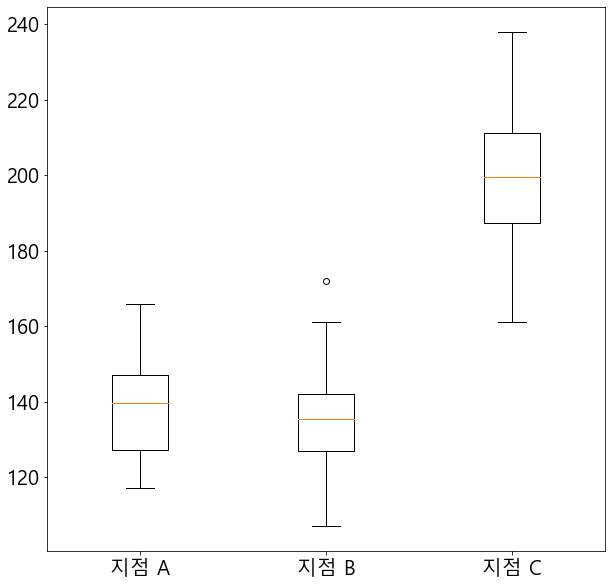

In [8]:
# 박스플롯으로 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10, 10)
plt.boxplot([A, B, C])
plt.xticks([1, 2, 3], ['지점 A', '지점 B', '지점 C'])

In [10]:
# 정규성 검정 : 세 변수 모두 정규분포를 띔을 확인
print(kstest(A, 'norm'))
print(kstest(B, 'norm'))
print(kstest(C, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [11]:
# 일원분산분석 수행 : p-value가 거의 0에 수렴 => A, B, C의 평균은 유의한 차이가 존재
print(f_oneway(A, B, C))

F_onewayResult(statistic=178.43825416847133, pvalue=1.6337420285664805e-31)


In [12]:
# 사후 분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd
Group = ['A'] * len(A) + ['B'] * len(B) + ['C'] * len(C)
Data = A.tolist() + B.tolist() + C.tolist()

print(pairwise_tukeyhsd(Data, Group))

# 결론 : [A, B] / [C]로 데이터가 구분됨
# A ~ B는 유의한 차이가 존재하지 않음
# A ~ C는 유의한 차이 존재
# B ~ C는 유의한 차이 존재

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B     -1.4   0.9 -10.5745  7.7745  False
     A      C  62.2333 0.001  53.0589 71.4078   True
     B      C  63.6333 0.001  54.4589 72.8078   True
----------------------------------------------------
